https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline

**Data Intro Basic**

1.1 Data Dictionary
- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = -Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left -ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Early Data Exploratory**

In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
heart_data.shape

(303, 14)

**Data Sorting**

In [9]:
categorical_col, contin_val=[],[]

for i in heart_data.columns:
    
    if heart_data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print('categorical_col')
print(categorical_col)
print('\n')
print('contin_val')
print(contin_val)

categorical_col
[]


contin_val
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


**Data - Unique**

In [10]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [11]:
dict = {}
for i in list(heart_data.columns):
    dict[i] = heart_data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


**Data 0/1**

In [12]:
#categorical
columnsYN = ['sex','cp','fbs','restecg','thall','exng','slp','caa']

In [13]:
continuous = ['age','trtbps','chol','thalachh','oldpeak']

In [14]:
target = ['output']

In [15]:
heart_data[columnsYN]

,sex,cp,fbs,restecg,thall,exng,slp,caa
0,1,3,1,0,1,0,0,0
1,1,2,0,1,2,0,0,0
2,0,1,0,0,2,0,2,0
3,1,1,0,1,2,0,2,0
4,0,0,0,1,2,1,2,0
...,...,...,...,...,...,...,...,...
298,0,0,0,1,3,1,1,0
299,1,3,0,1,3,0,1,0
300,1,0,1,1,3,0,1,2
301,1,0,0,1,3,1,1,1


no datas needed to be change from yes no to 0/1

**Missing Values**

-to check

-to deal with

In [16]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Encoding Categorical Variables**

- le = preprocessing.LabelEncoder()

-no need since all is encoded

**Standard Scaler** (incase)

- from sklearn.preprocessing import StandardScaler
- create instance
    scaler = StandardScaler()
- fit data into scaler 
    scaler.fit(df.drop('TARGET CLASS',axis=1))
- transform() 
    scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Data Analysis and Evaluation**

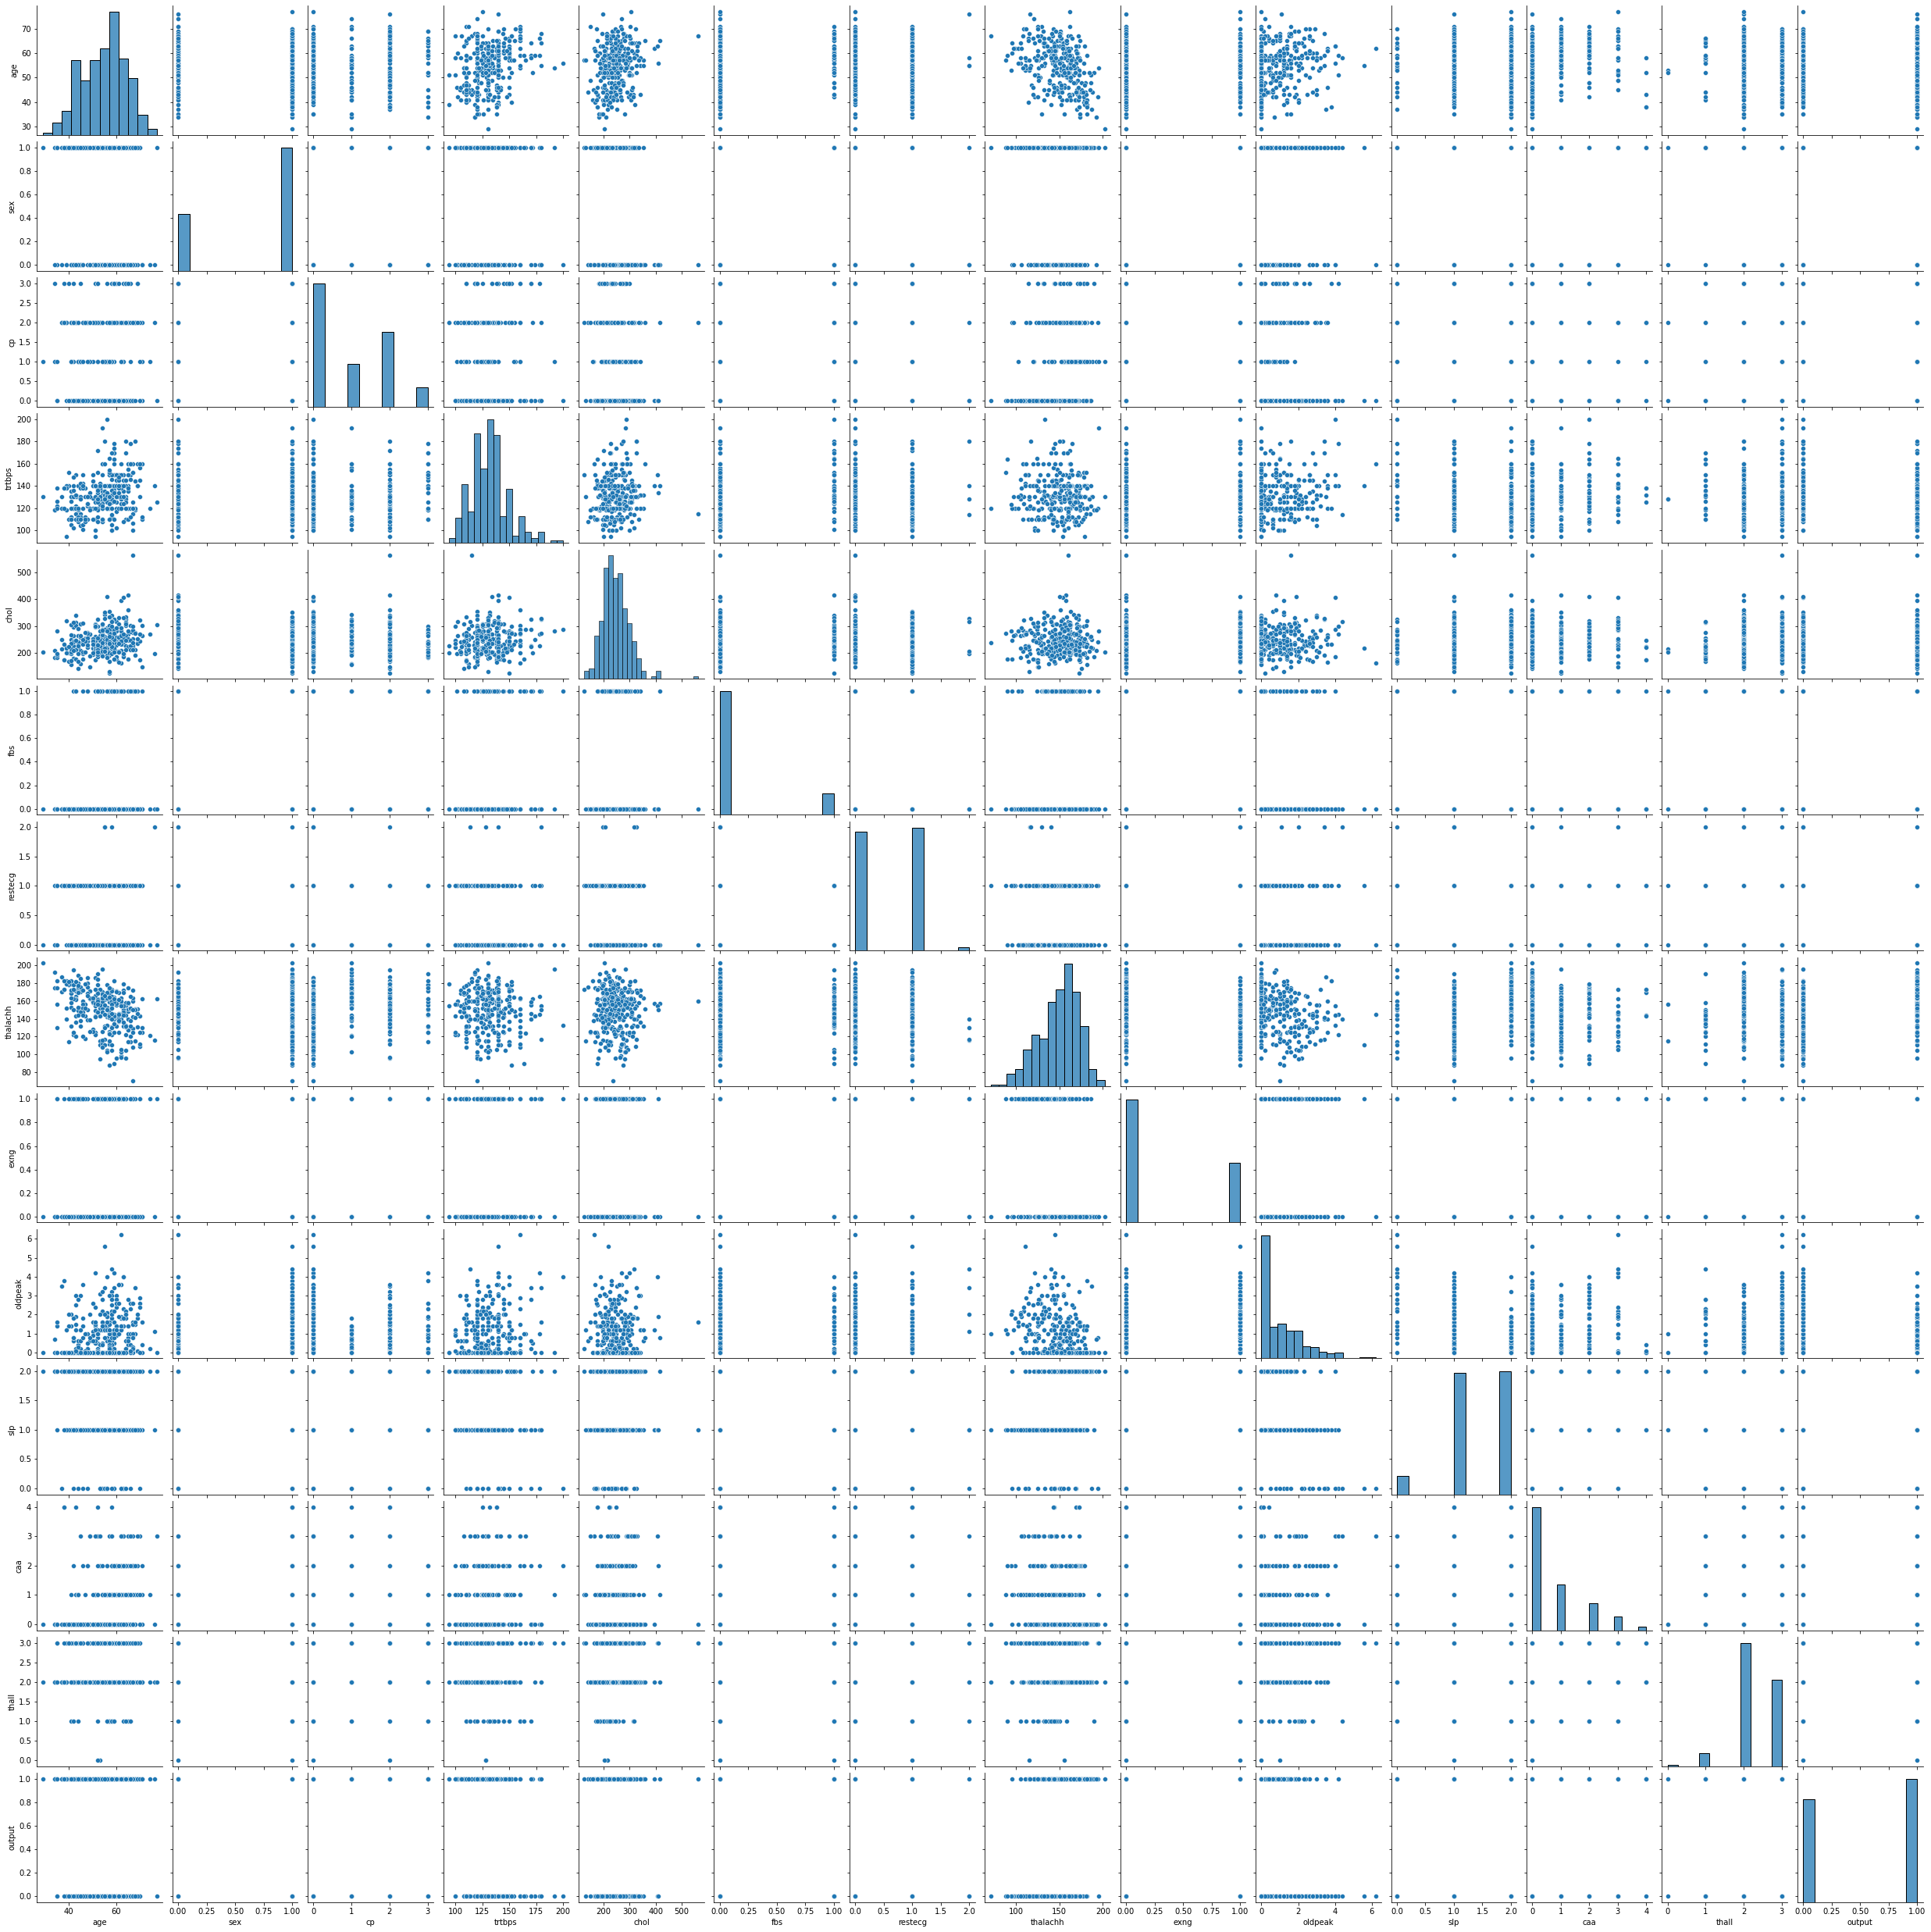

In [17]:
sns.pairplot(heart_data)

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Sex')

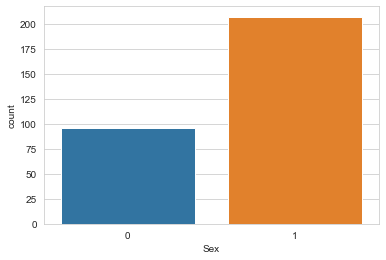

In [18]:
#Countplot for categorical
sns.set_style("whitegrid")
sns.countplot(heart_data['sex'])
plt.xlabel('Sex')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fasting Blood Sugar')

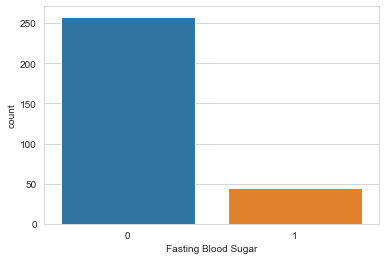

In [19]:
sns.set_style("whitegrid")
sns.countplot(heart_data['fbs'])
plt.xlabel('Fasting Blood Sugar')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Chest Pain Type')

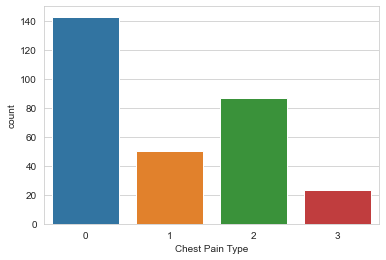

In [20]:
sns.set_style("whitegrid")
sns.countplot(heart_data['cp'])
plt.xlabel('Chest Pain Type')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Resting Electrocardiograph')

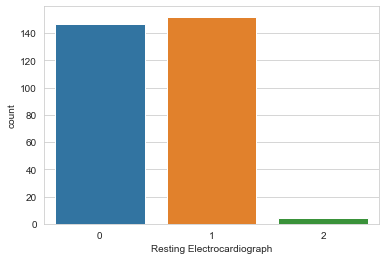

In [21]:
sns.set_style("whitegrid")
sns.countplot(heart_data['restecg'])
plt.xlabel('Resting Electrocardiograph')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Slope')

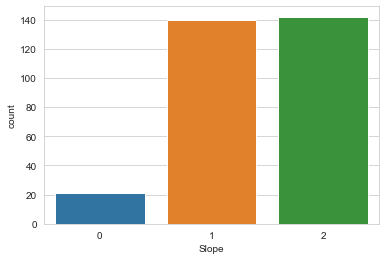

In [22]:
sns.set_style("whitegrid")
sns.countplot(heart_data['slp'])
plt.xlabel('Slope')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Major Vessels')

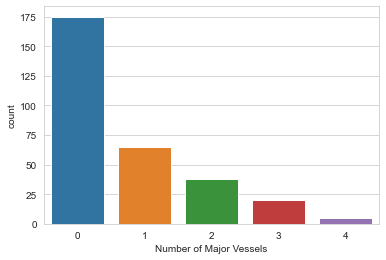

In [23]:
sns.set_style("whitegrid")
sns.countplot(heart_data['caa'])
plt.xlabel('Number of Major Vessels')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Thalium Stress')

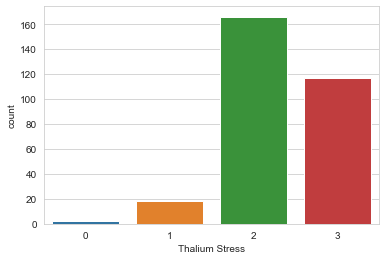

In [24]:
sns.set_style("whitegrid")
sns.countplot(heart_data['thall'])
plt.xlabel('Thalium Stress')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Exercise Induced Angina')

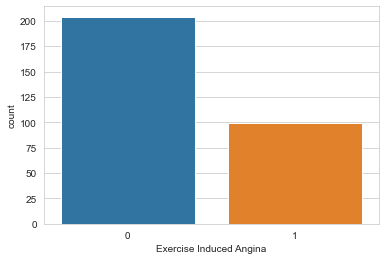

In [25]:
sns.set_style("whitegrid")
sns.countplot(heart_data['exng'])
plt.xlabel('Exercise Induced Angina')

In [26]:
heart_data['output'].dtype

dtype('int64')

F:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

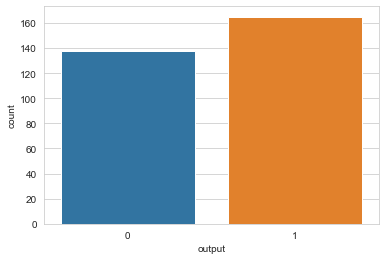

In [27]:
#plot for target
sns.countplot(heart_data['output'])

In [28]:
heart_data[continuous].corr()

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

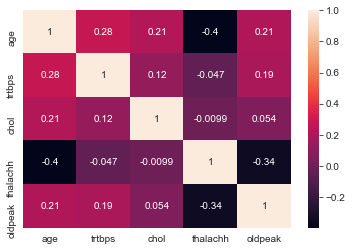

In [30]:
sns.heatmap(heart_data[continuous].corr(),annot=True)

<AxesSubplot:title={'center':'Distribution of Age according to Target Variable'}, xlabel='age', ylabel='Density'>

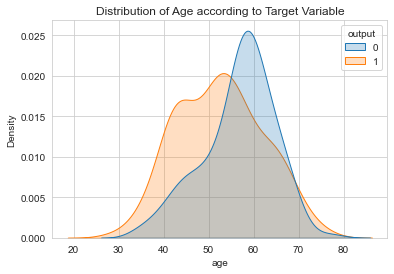

In [38]:
plt.title('Distribution of Age according to Target Variable')
sns.kdeplot(data=heart_data,x='age',hue='output',fill=True)

<AxesSubplot:title={'center':"Distribution of 'Resting Blood Pressure' according to Target Variable"}, xlabel='trtbps', ylabel='Density'>

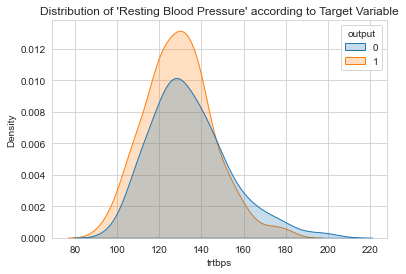

In [39]:
plt.title("Distribution of 'Resting Blood Pressure' according to Target Variable")
sns.kdeplot(data=heart_data,x='trtbps',hue='output',fill=True)

<AxesSubplot:title={'center':"Distribution of 'Cholestrol in mg/dl' according to Target Variable"}, xlabel='chol', ylabel='Density'>

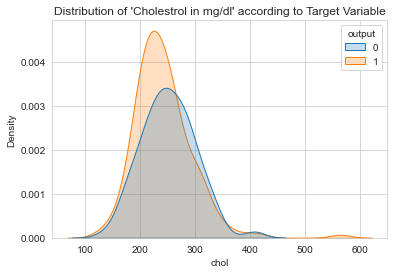

In [40]:
plt.title("Distribution of 'Cholestrol in mg/dl' according to Target Variable")
sns.kdeplot(data=heart_data,x='chol',hue='output',fill=True)

<AxesSubplot:title={'center':"Distribution of 'Maximum Heart Rate Achieved' according to Target Variable"}, xlabel='thalachh', ylabel='Density'>

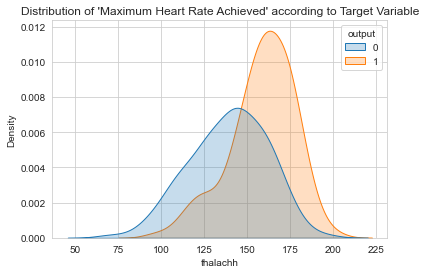

In [41]:
plt.title("Distribution of 'Maximum Heart Rate Achieved' according to Target Variable")
sns.kdeplot(data=heart_data,x='thalachh',hue='output',fill=True)

<AxesSubplot:title={'center':"Distribution of 'Previous Peak' according to Target Variable"}, xlabel='oldpeak', ylabel='Density'>

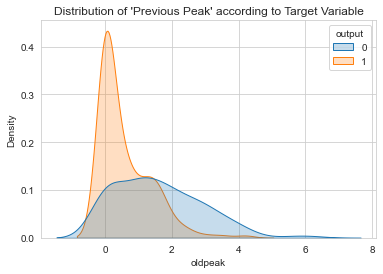

In [42]:
plt.title("Distribution of 'Previous Peak' according to Target Variable")
sns.kdeplot(data=heart_data,x='oldpeak',hue='output',fill=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

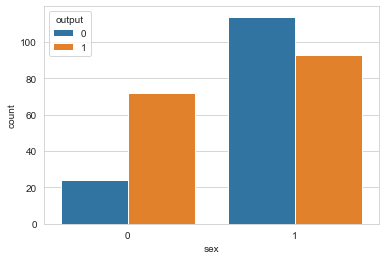

In [46]:
sns.countplot(data=heart_data,x='sex',hue='output')

<AxesSubplot:>

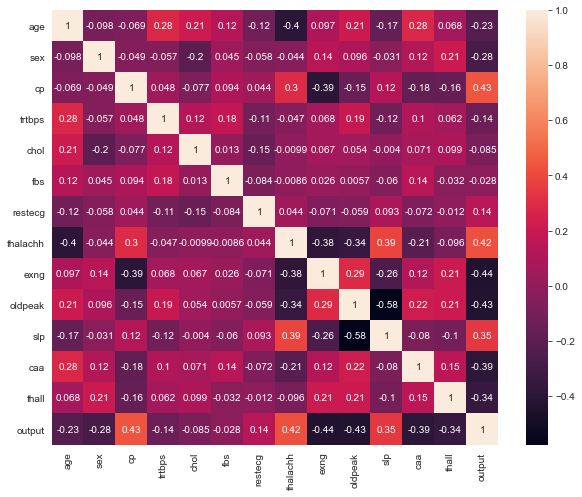

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.corr(), annot=True)

**Evaluation**
- there are no NaN values
- the data has more data for sex=1 compared to sex=1
- there is no apparent linear correlation
- the heatmap suggest there might be some correlation between cp and output, cp and thalachh, thalachh and output, thalachh and slp
- the heatmap suggest there are significant negative correlation between cp and exng, age and thalachh and etc
- based on kdeplot of maximum heart rate achieved, people with higher heart rate have more chances of getting heart attack
- based on kdeplot of old peak, people with lower previous peak have higher chances of heart attack

**Train Test Split**

In [52]:
#defining the features
X = heart_data.drop('output',axis=1)
y = heart_data['output']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**NaN and Inf Check**

#Nan and inf check
-  print(np.isnan(X))
-  print(np.isfinite(X))

-  print(np.any(np.isnan(X)))
-  print(np.all(np.isfinite(X)))

np.any isnan must return False
np.all isfinite must return True

In [54]:
print(np.isnan(X))
print(np.isfinite(X))

print(np.any(np.isnan(X)))
print(np.all(np.isfinite(X)))


       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  
0      False  False  False  False  
1      False  F

- there are no NaN values

**Model Fit**

-  from _ import _
-  assign instance
-  set predict

print (confusion_matrix(y_test,predictions))
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
##creating copy for dataframe

heart_data2 = heart_data

##encoding categorical columns
heart_data2 = pd.get_dummies(heart_data2,columns=columnsYN,drop_first = True)

##defining the DUMMY FEATURES
X = heart_data2.drop(['output'],axis=1)
y = heart_data2['output']

#scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

#scaling the continuous feature
X[continuous] = mms.fit_transform(X[continuous])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,thall_1,thall_2,thall_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [107]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#calling the shape of data
print (f'X_train = {X_train.shape}')
print (f'X_test = {X_test.shape}')
print (f'y_train = {y_train.shape}')
print (f'y_test = {y_test.shape}')


X_train = (212, 22)
X_test = (91, 22)
y_train = (212,)
y_test = (91,)


In [108]:
#logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

In [109]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[36  8]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.85      0.94      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Accuracy: 0.8791208791208791


In [117]:
sns.regplot(x='X', y='Y', data=heart_data, logistic=True)

KeyError: 'X'

In [80]:
#decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

In [81]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[31 13]
 [10 37]]


              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.74      0.79      0.76        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

Accuracy: 0.7472527472527473


In [82]:
#random forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

predictions = rf.predict(X_test)

In [83]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[35  9]
 [ 9 38]]


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        44
           1       0.81      0.81      0.81        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Accuracy: 0.8021978021978022


In [84]:
#gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

predictions =  gbc.predict(X_test)

In [85]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[36  8]
 [ 8 39]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Accuracy: 0.8241758241758241


In [92]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

In [93]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[34 10]
 [ 7 40]]


              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy: 0.8131868131868132


In [94]:
#grid search
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)


gscv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [95]:
print (confusion_matrix(y_test,predictions)) 
print('\n')
print (classification_report(y_test,predictions))

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[34 10]
 [ 7 40]]


              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy: 0.8131868131868132


In [98]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

WITH K=30


[[36  8]
 [ 6 41]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Accuracy: 0.8131868131868132
